In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
%matplotlib notebook

## Cargando la información

In [3]:
data = dict(loadmat('../Data/Chua_1200x1200_3ga43.fig'))

## Mapa de color

Se extrae el arreglo con los colores correspondientes al mapa de color

In [4]:
mat_colors = data['hgS_070000'][0][0][2][0][0][1]

# Convirtiendo el arreglo al formato del mapa de colores para usar el mapa de matlab
cmp = ListedColormap(np.hstack([mat_colors, np.ones((len(mat_colors), 1))]))

## Exponentes de Lyapunov

Se extrae la matriz que contiene el valor de los exponentes

La matriz está volcada, se debe invertir el orden vertical para generar la misma gráfica del artículo

In [5]:
mat = data['hgS_070000'][0, 0][3][0, 0][3][0, 0][2][0, 0][0]
mat = mat.astype(np.float64)
mat.dtype

# Invirtiendo las filas porque sino no encaja con la figura
mat = mat[::-1, :]

# print(mat)

## Visualización

<IPython.core.display.Javascript object>


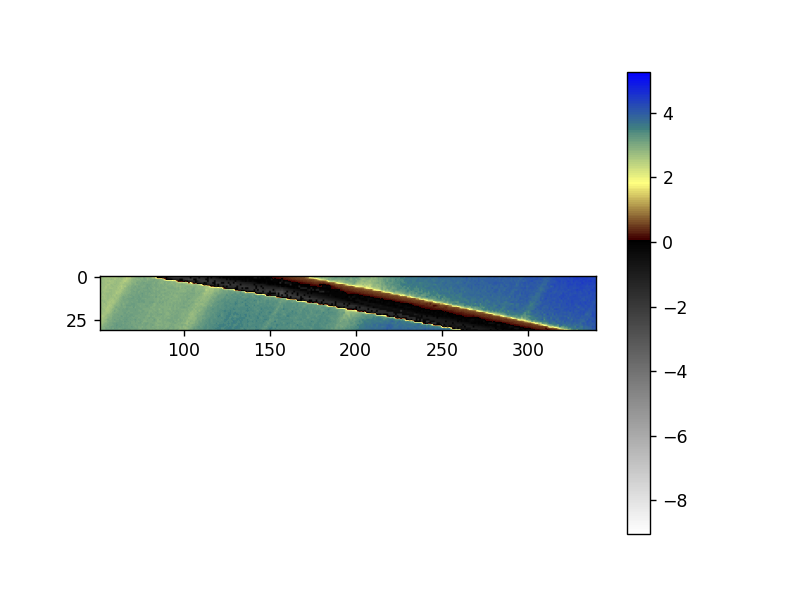

In [6]:
plt.imshow(mat, cmap=cmp)
plt.colorbar()
plt.show()

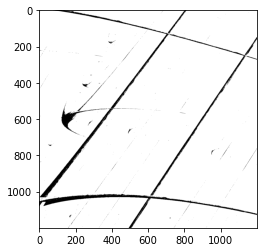

In [7]:
plt.imshow(mat>0, cmap='gray')
plt.show()

Guardando la matriz en formato npy

In [8]:
np.save('../Data/lyapunov_exp.npy', mat)

## Valores $\alpha$ y $\gamma$

Se extraen los vectores en formato similar a una meshgrid

In [9]:
# 1440000 elements (1200x1200)
# Está en formato similar a meshgrid
# alpha va de inicio a final cada 1200 y se repite el patrón
# gamma repite 1200 veces el primer valor, 1200 el segundo y así
alpha_vals_raw = data['hgS_070000'][0, 0][3][0, 0][3][0, 0][2][0, 0][2].ravel()
gamma_vals_raw = data['hgS_070000'][0, 0][3][0, 0][3][0, 0][2][0, 0][3].ravel()

print(alpha_vals_raw)
print(gamma_vals_raw)

[265.6      265.624854 265.649708 ... 295.350292 295.375146 295.4     ]
[0.567 0.567 0.567 ... 0.693 0.693 0.693]


Se crea un arreglo 3D con dos "canales", el primero contiene los valores de $\alpha$ y el segundo de $\gamma$

In [10]:
alpha_gamma_mat = np.empty((1200, 1200, 2))

i, j = 0, 0
for α, γ in zip(alpha_vals_raw, gamma_vals_raw):
    i = i % 1200
    j = j % 1200
    
    alpha_gamma_mat[i, j] = (α, γ)
    
    j += 1
    if j == 1200:
        i += 1
    
alpha_gamma_mat = alpha_gamma_mat[::-1, :]

# print(alpha_gamma_mat)

Guardando la matriz en formato npy

In [12]:
np.save('../Data/alpha_gamma.npy', alpha_gamma_mat)